In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn

In [17]:
df = pd.read_csv('final_dataset.csv')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495109 entries, 0 to 495108
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    495109 non-null  int64  
 1    Total Backward Packets       495109 non-null  float64
 2    Total Length of Bwd Packets  495109 non-null  float64
 3   Bwd Packet Length Max         495109 non-null  float64
 4    Flow Packets/s               495109 non-null  float64
 5    Bwd Packets/s                495109 non-null  float64
 6    Packet Length Variance       495109 non-null  float64
 7    PSH Flag Count               495109 non-null  float64
 8    Down/Up Ratio                495109 non-null  float64
 9    Subflow Bwd Packets          495109 non-null  float64
 10   Subflow Bwd Bytes            495109 non-null  float64
 11  Init_Win_bytes_forward        495109 non-null  float64
 12   act_data_pkt_fwd             495109 non-nul

In [19]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values    # predictor attributes
y=df.iloc[:,-1].values     # target attributes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Testing accuracy

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     74529
        DDoS       1.00      1.00      1.00     45307
 FTP-Patator       1.00      1.00      1.00      2450
    PortScan       1.00      1.00      1.00     23879
 SSH-Patator       1.00      1.00      1.00      1736
  Web Attack       0.93      0.95      0.94       632

    accuracy                           1.00    148533
   macro avg       0.99      0.99      0.99    148533
weighted avg       1.00      1.00      1.00    148533



In [25]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[74394    72     8     5     7    43]
 [   46 45256     0     2     0     3]
 [    1     0  2449     0     0     0]
 [    2    10     0 23865     0     2]
 [    1     1     0     0  1734     0]
 [   33     1     0     0     0   598]]
Accuracy of prediction: 0.806


# Training accuracy

In [31]:
predictions = dtree.predict(X_train)

In [37]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    173205
        DDoS       1.00      1.00      1.00    106588
 FTP-Patator       1.00      1.00      1.00      5488
    PortScan       1.00      1.00      1.00     55586
 SSH-Patator       1.00      1.00      1.00      4161
  Web Attack       1.00      1.00      1.00      1548

    accuracy                           1.00    346576
   macro avg       1.00      1.00      1.00    346576
weighted avg       1.00      1.00      1.00    346576



In [33]:
cm=confusion_matrix(y_train,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[173205      0      0      0      0      0]
 [     0 106588      0      0      0      0]
 [     0      0   5488      0      0      0]
 [     0      0      0  55586      0      0]
 [     0      0      0      0   4161      0]
 [     0      0      0      0      0   1548]]
Accuracy of prediction: 0.807



# Heat Map

In [34]:
labels = ['BENIGN', 'DDoS', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'Web Attack']

Text(69.0, 0.5, 'Actual Values')

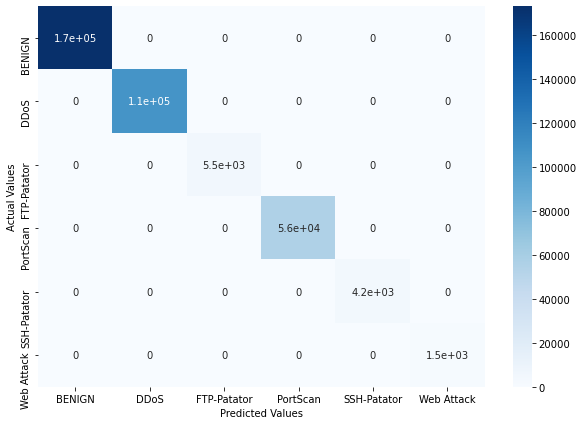

In [36]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')